In [1]:
# we will make a model to predict the price of a house from housing data

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np

In [6]:
data = pd.read_csv(r'D:\excel\Delhi house data.csv')

In [7]:
data.shape

(1259, 11)

In [8]:
data.head()

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,NaN
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0


In [9]:
data.columns

Index(['Area', 'BHK', 'Bathroom', 'Furnishing', 'Locality', 'Parking', 'Price',
       'Status', 'Transaction', 'Type', 'Per_Sqft'],
      dtype='object')

In [10]:
data.describe()

,Area,BHK,Bathroom,Parking,Price,Per_Sqft
count,1259.000000,1259.000000,1257.000000,1226.000000,1.259000e+03,1018.000000
mean,1466.452724,2.796664,2.556086,1.935563,2.130670e+07,15690.136542
std,1568.055040,0.954425,1.042220,6.279212,2.560115e+07,21134.738568
min,28.000000,1.000000,1.000000,1.000000,1.000000e+06,1259.000000
25%,800.000000,2.000000,2.000000,1.000000,5.700000e+06,6364.000000
50%,1200.000000,3.000000,2.000000,1.000000,1.420000e+07,11291.500000
75%,1700.000000,3.000000,3.000000,2.000000,2.550000e+07,18000.000000
max,24300.000000,10.000000,7.000000,114.000000,2.400000e+08,183333.000000


In [11]:
# missing values

In [12]:
data.isnull().sum()

Area             0
BHK              0
Bathroom         2
Furnishing       5
Locality         0
Parking         33
Price            0
Status           0
Transaction      0
Type             5
Per_Sqft       241
dtype: int64

In [26]:
data.dropna(inplace=True)

In [27]:
data.isnull().sum()

Area           0
BHK            0
Bathroom       0
Furnishing     0
Locality       0
Parking        0
Price          0
Status         0
Transaction    0
Type           0
Per_Sqft       0
dtype: int64

In [28]:
#visualization

In [29]:
data.columns

Index(['Area', 'BHK', 'Bathroom', 'Furnishing', 'Locality', 'Parking', 'Price',
       'Status', 'Transaction', 'Type', 'Per_Sqft'],
      dtype='object')

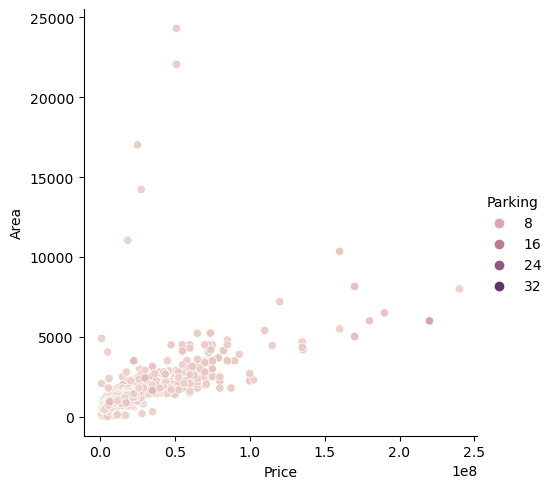

In [31]:
sns.relplot(x='Price', y='Area' , hue='Parking' , data=data) # linarea regression

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [33]:
data.columns

Index(['Area', 'BHK', 'Bathroom', 'Furnishing', 'Locality', 'Parking', 'Price',
       'Status', 'Transaction', 'Type', 'Per_Sqft'],
      dtype='object')

In [70]:
train = data.drop(['Price','Furnishing','Locality','Status','Transaction','Type'] , axis = 1)
train
test = data['Price']
test

1        5000000
2       15500000
3        4200000
4        6200000
5       15500000
          ...   
1254    55000000
1255    12500000
1256    17500000
1257    11500000
1258    18500000
Name: Price, Length: 1005, dtype: int64

In [71]:
X_train  ,X_test , y_train , y_test = train_test_split(train,test,test_size = 0.3 , random_state = 2) 

In [72]:
regr = LinearRegression()

In [73]:
data.head()

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0
5,1300.0,4,3.0,Semi-Furnished,Rohini Sector 24,1.0,15500000,Ready_to_move,New_Property,Builder_Floor,6667.0


In [74]:
X_train.head()

,Area,BHK,Bathroom,Parking,Per_Sqft
124,1500.0,3,3.0,2.0,9259.0
890,900.0,2,2.0,1.0,4270.0
162,729.0,3,4.0,1.0,3567.0
498,2306.0,3,3.0,1.0,24718.0
200,700.0,3,2.0,1.0,6714.0


In [75]:
regr.fit(X_train , y_train)

LinearRegression()

In [76]:
pred  =regr.predict(X_test)

In [77]:
X_test

,Area,BHK,Bathroom,Parking,Per_Sqft
55,1500.0,3,3.0,1.0,22000.0
461,1450.0,3,2.0,2.0,15500.0
470,1100.0,2,2.0,2.0,21818.0
457,2000.0,3,3.0,1.0,15500.0
682,1455.0,2,2.0,2.0,18900.0
...,...,...,...,...,...
530,58.0,2,1.0,1.0,6667.0
622,850.0,3,3.0,1.0,11111.0
1032,1280.0,3,3.0,2.0,14092.0
805,1300.0,3,3.0,1.0,4138.0


In [78]:
pred

array([ 2.92245996e+07,  1.35700173e+07,  1.33319503e+07,  3.00823889e+07,
        1.42493640e+07,  5.76709503e+06,  2.78794661e+07, -5.98568941e+05,
        1.18500485e+07, -6.00584137e+06,  2.69156198e+07,  1.12062287e+08,
        4.47771572e+07,  1.37984317e+07,  1.35328529e+07,  8.34306063e+06,
        4.82600789e+07,  9.60723231e+06,  1.42645219e+07,  2.73913639e+07,
       -6.91617998e+06, -7.85202705e+06,  9.02750432e+06,  5.91334935e+07,
        3.12635441e+07,  4.34144190e+07, -6.53427951e+06,  2.84951299e+07,
        6.62504489e+07,  1.19305614e+07,  9.82358926e+06,  1.40126109e+07,
        7.60378598e+06,  6.29489884e+07,  4.53917782e+07,  4.49761364e+07,
        1.07936149e+07,  3.01534762e+07,  1.05154728e+07, -4.99084577e+06,
       -7.60197083e+06,  9.63261747e+06,  4.74564613e+07,  1.05921656e+07,
       -7.64307063e+06,  2.40824119e+07,  1.24511651e+07,  3.09422176e+07,
        1.44676401e+07,  9.22332035e+06,  7.85427366e+06,  7.34567071e+07,
        4.10442407e+07,  

In [79]:
regr.score(X_test , y_test)

0.6462678505601405

In [80]:
pwd

'C:\\Users\\Mudit Singal\\Desktop\\youtude'

In [83]:
print(dir(regr))

['__abstractmethods__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_check_feature_names', '_check_n_features', '_decision_function', '_estimator_type', '_get_param_names', '_get_tags', '_more_tags', '_repr_html_', '_repr_html_inner', '_repr_mimebundle_', '_set_intercept', '_validate_data', 'coef_', 'copy_X', 'feature_names_in_', 'fit', 'fit_intercept', 'get_params', 'intercept_', 'n_features_in_', 'n_jobs', 'normalize', 'positive', 'predict', 'rank_', 'score', 'set_params', 'singular_']
